# Computer Vision for Beginners: Part 3

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- Part 2: The basics of image processing with filtering
- ***Part 3: From feature detection to face detection***
- Part 4: Image Segmentation and Watershed Algorithm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Edge Detection

In [44]:
img = cv2.imread('images/city.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 695.5, 390.5, -0.5)

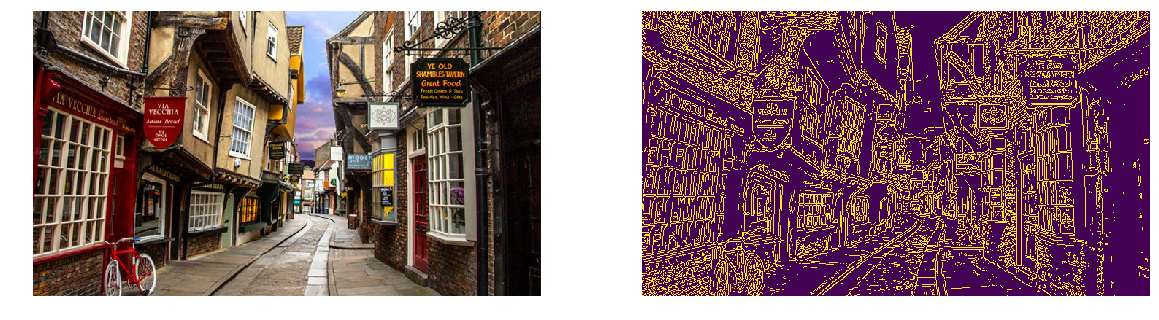

In [50]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

In [47]:
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
print(lower, upper)

51 94


(-0.5, 695.5, 390.5, -0.5)

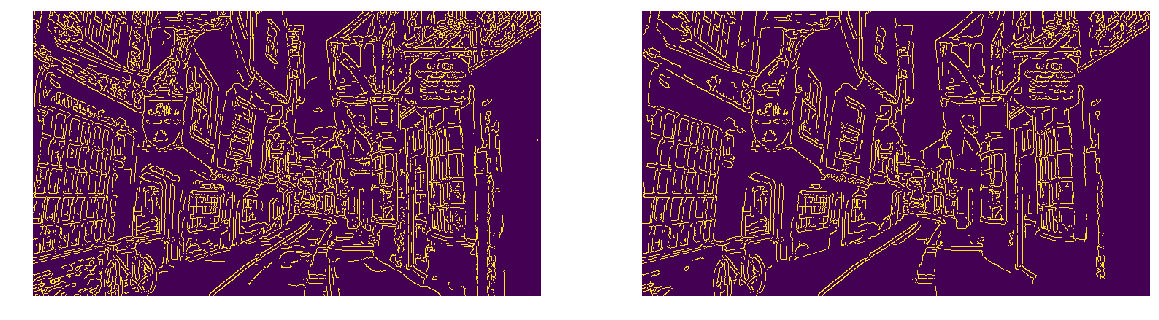

In [48]:
img_blur_5 = cv2.blur(img, ksize = (5, 5))

edges = cv2.Canny(img_blur_5, threshold1 = lower, threshold2 = upper)
edges_2 = cv2.Canny(img_blur_5, threshold1 = lower, threshold2 = upper+100)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(edges)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges_2)
plt.axis('off')

(-0.5, 695.5, 390.5, -0.5)

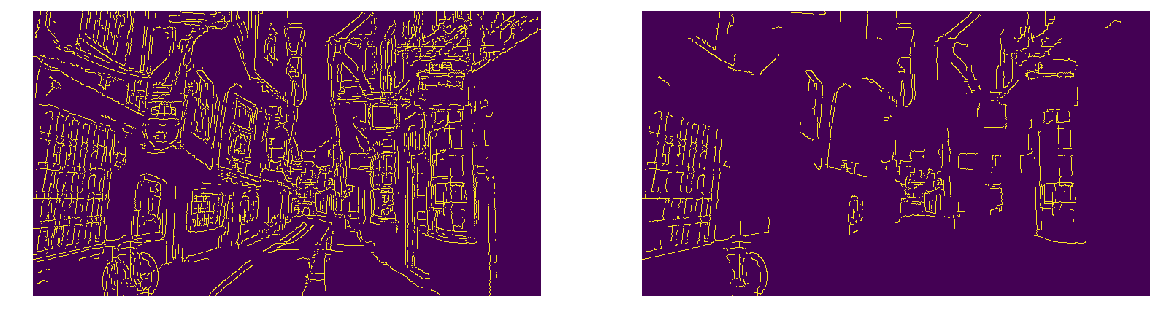

In [49]:
img_blur_9 = cv2.blur(img, ksize = (9, 9))

edges = cv2.Canny(img_blur_9, threshold1 = lower, threshold2 = upper)
edges_2 = cv2.Canny(img_blur_9, threshold1 = lower, threshold2 = upper+100)

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(edges)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges_2)
plt.axis('off')

# Corner Detection

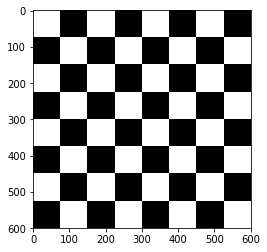

In [12]:
img = cv2.imread('images/grid.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

# Contour Detection

# Face Detection

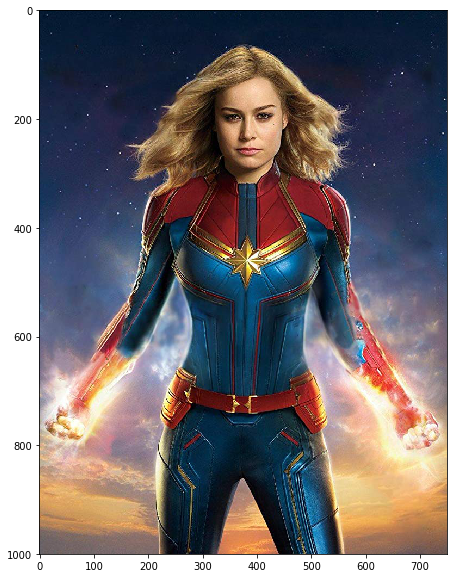

In [23]:
cap_mavl = cv2.imread('images/captin_marvel.jpg')
cap_mavl = cv2.cvtColor(cap_mavl, cv2.COLOR_BGR2RGB) 
display(cap_mavl)

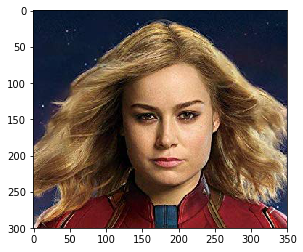

In [24]:
roi = cap_mavl[50:350, 200:550]
plt.imshow(roi)

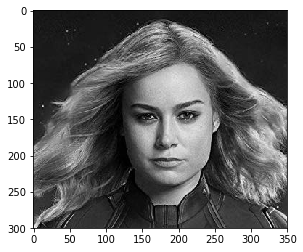

In [26]:
roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
plt.imshow(roi, cmap = 'gray')
plt.axis('off')

In [28]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [33]:
def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

(-0.5, 349.5, 299.5, -0.5)

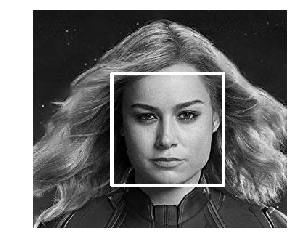

In [38]:
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')

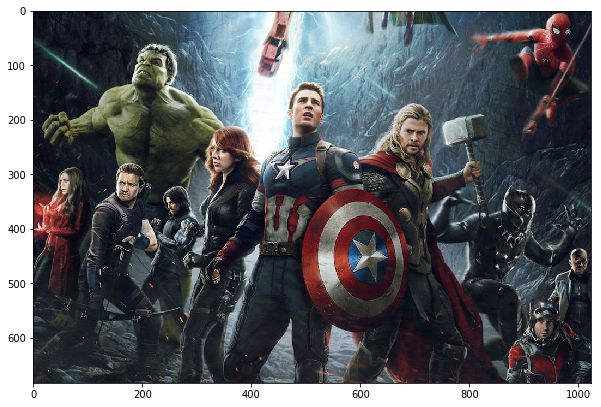

In [41]:
avengers = cv2.imread('images/avergers.jpg')
avengers = cv2.cvtColor(avengers, cv2.COLOR_BGR2RGB)
display(avengers)

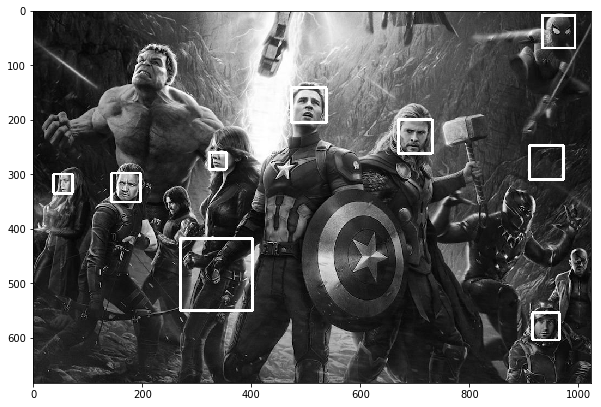

In [44]:
avengers = cv2.cvtColor(avengers, cv2.COLOR_RGB2GRAY)
detected_avengers = detect_face(avengers)
display(detected_avengers, cmap = 'gray')

# Face Detection with Video

In [ ]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()